# Pre Processing

*   Sebelum memulai running pastikan data path sudah disesuaikan
*   Mungkin masih terdapat beberapa baris yang akan menimbulkan error, bisa diabaikan lanjut ke tahap selanjutnya.
*   Bila terdapat kesulitan dapat menghubungi Farrel Via WA (081331013216)

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
from nltk.corpus import stopwords
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [ ]:
filepath = '/content/drive/MyDrive/penelitian/data5/data label fix/train_new/train_jenisvaksin.xlsx'
unclean_data = pd.read_excel(filepath)
print(len(unclean_data))
unclean_data.info()

5011
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          5011 non-null   int64 
 1   id                  5011 non-null   int64 
 2   date                5011 non-null   object
 3   username            5011 non-null   object
 4   tweet               5010 non-null   object
 5   replies_count       5011 non-null   int64 
 6   retweets_count      5011 non-null   int64 
 7   likes_count         5011 non-null   int64 
 8   link                5011 non-null   object
 9   tweet_preprocessed  5011 non-null   object
 10  labels              5011 non-null   object
 11  NEUTRAL             5011 non-null   int64 
 12  POSITIVE            5011 non-null   int64 
 13  NEGATIVE            5011 non-null   int64 
 14  response            3003 non-null   object
dtypes: int64(8), object(7)
memory usage: 587.4+ KB


In [ ]:
unclean_data = pd.read_excel('/content/drive/MyDrive/penelitian/data4/Train/(Edited) train_jenis vaksin_prokontra.xlsx')
unclean_data

,Unnamed: 0,id,date,username,tweet,link,replies_count,retweets_count,likes_count,moderna,astra,pfizer,sinovac,tweet_preprocessed,labels,response
0,0,1343436517113556992,2020-12-28,matamilenialid,"Tenang, Sandiaga Janji Vaksin Covid-19 Diprior...",https://twitter.com/matamilenialID/status/1343...,0,0,0,0,0,0,0,tenang sandiaga janji vaksin covid19 dipriorit...,vaksinasi,netral
1,1,1343367700479835904,2020-12-28,wow_keren,"Dongkrak Wisata dan Ekonomi, Sandiaga Utamakan...",https://twitter.com/wow_keren/status/134336770...,0,0,0,0,0,0,0,dongkrak wisata ekonomi sandiaga utamakan vaks...,vaksinasi,netral
2,2,1343178718110309888,2020-12-27,id_aksi,Sandiaga Uno Proritaskan Vaksin Covid-19 untuk...,https://twitter.com/id_aksi/status/13431787181...,0,0,0,0,0,0,0,sandiaga uno proritaskan vaksin covid19 wisata...,vaksinasi,netral
3,3,1343072328003898880,2020-12-27,tonaytoni,@ketanminis @tjhinfar21 @kianinara1 @Semut2Sem...,https://twitter.com/tonaytoni/status/134307232...,0,0,3,0,0,0,0,ketanminis tjhinfar21 kianinara1 semut2semut b...,vaksinasi,netral
4,4,1341908620045296128,2020-12-24,stefanusnofa,@berlian_idris @mbahndi Salah satu syarat vaks...,https://twitter.com/stefanusnofa/status/134190...,2,2,10,0,0,0,1,berlianidris mbahndi salah satu syarat vaksin ...,vaksinasi,ragu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,3395,1416087088651333888,2021-07-16,ariswila,"Sambil menunggu hasil akhir Vaksin Nusantara, ...",https://twitter.com/ArisWila/status/1416087088...,4,10,59,0,0,0,0,menunggu hasil akhir vaksin nusantara untuk me...,vaksinasi,pro
3396,3396,1416081394070016000,2021-07-16,qronoz,@sylvkartika @NNugie @rahmimimi Katanya kalo g...,https://twitter.com/qronoz/status/141608139407...,1,0,0,0,0,0,0,sylvkartika nnugie rahmimimi katanya kalau gak...,vaksinasi,pro
3397,3397,1416076363006550016,2021-07-16,rman46,@Dennysiregar7 Bnyk orang indonesia nunggu vak...,https://twitter.com/rman46/status/141607636300...,0,0,0,0,0,0,0,dennysiregar7 banyak orang indonesia nunggu va...,vaksinasi,pro
3398,3398,1416073251239854080,2021-07-16,bocaharusbawah,@ArisWila Kapan ya vaksin nusantara bisa spt v...,https://twitter.com/BocahArusBawah/status/1416...,1,0,1,0,0,0,1,ariswila kapan vaksin nusantara seperti vaksin...,vaksinasi,pro


In [ ]:
unclean_data = unclean_data.dropna(axis=0, how='all')
unclean_data = unclean_data.dropna(axis=1, how='all')
unclean_data['replies_count'] = unclean_data['replies_count'].replace(np.nan, 0).astype(int)
unclean_data['retweets_count'] = unclean_data['retweets_count'].replace(np.nan, 0).astype(int)
unclean_data['likes_count'] = unclean_data['likes_count'].replace(np.nan, 0).astype(int)
# unclean_data = unclean_data.drop(columns=['user_id','mentions','created_at', 'name','photos','cashtags','video','thumbnail','Unnamed: 0','conversation_id','time','timezone','place','language','urls','hashtags','retweet','quote_url','reply_to'])
unclean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5011 entries, 0 to 5010
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          5011 non-null   int64 
 1   id                  5011 non-null   int64 
 2   date                5011 non-null   object
 3   username            5011 non-null   object
 4   tweet               5010 non-null   object
 5   replies_count       5011 non-null   int64 
 6   retweets_count      5011 non-null   int64 
 7   likes_count         5011 non-null   int64 
 8   link                5011 non-null   object
 9   tweet_preprocessed  5011 non-null   object
 10  labels              5011 non-null   object
 11  NEUTRAL             5011 non-null   int64 
 12  POSITIVE            5011 non-null   int64 
 13  NEGATIVE            5011 non-null   int64 
 14  response            3003 non-null   object
dtypes: int64(8), object(7)
memory usage: 626.4+ KB


In [ ]:
unclean_data = pd.read_csv('/content/drive/MyDrive/penelitian/data5/data label/data test/nostemm_test_jenisvaksin_sentiment.csv')

In [ ]:
unclean_data

,Unnamed: 0,id,date,username,tweet,replies_count,retweets_count,likes_count,link,tweet_preprocessed,labels,NEUTRAL,POSITIVE,NEGATIVE,response
0,10883,1414641002950761984,2021-07-12,themoonpolice,@FKadrun Kemanakah Vaksin Pfizer dan Moderna y...,1,0,7,https://twitter.com/themoonpolice/status/14146...,fkadrun kemanakah vaksin pfizer moderna dihiba...,jenis,0,0,1,pro
1,14892,1388660899372696064,2021-05-02,bisniscom,"WHO Izinkan Vaksin Moderna untuk Covid-19, Sin...",0,3,1,https://twitter.com/Bisniscom/status/138866089...,who izinkan vaksin moderna covid19 sinopharm s...,jenis,1,0,0,netral
2,6427,1424374845928656896,2021-08-08,genpi_co,"Sama seperti sinovac, vaksin jenis moderna jug...",0,0,0,https://twitter.com/Genpi_Co/status/1424374845...,sama sinovac vaksin jenis moderna tentunya mem...,jenis,0,1,0,netral
3,1841,1419899591168691968,2021-07-27,herimagek,@geloraco Menunggu penjelasan &amp; pertanggun...,0,0,4,https://twitter.com/herimagek/status/141989959...,geloraco menunggu penjelasan amp pertanggungja...,jenis,0,1,0,pro
4,11505,1414243077636509952,2021-07-11,hrmnt80,menggunakan pesawat Qatar Airways. Secara kese...,1,2,4,https://twitter.com/hrmnt80/status/14142430776...,menggunakan pesawat qatar airways keseluruhan ...,jenis,1,0,0,netral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,2623,1417672868683424000,2021-07-21,leonardsa,"Warga instagram pada goblok dan sok tau, asal ...",0,0,0,https://twitter.com/leonardSA/status/141767286...,warga instagram bodoh sok tahu asal dukung vak...,jenis,0,0,1,NaN
5007,12363,1413822463465512960,2021-07-10,dkitintarakyat,"Disiapkan Jadi Vaksin Ketiga, Ketua DPD RI Min...",0,0,0,https://twitter.com/DkiTintarakyat/status/1413...,disiapkan jadi vaksin ketiga ketua dpd ri mint...,jenis,0,1,0,NaN
5008,5695,1425384146558358016,2021-08-11,naqibahmd11,@HafiziFadhli Vaksin utk kurangkan pesakit mas...,0,1,0,https://twitter.com/NaqibAhmd11/status/1425384...,hafizifadhli vaksin untuk kurangkan pesakit ma...,jenis,0,1,0,NaN
5009,8006,1421980054750253056,2021-08-01,sonorafmjogja,#SelamatPagiJogja | Tribun Jogja : Indonesia P...,0,0,0,https://twitter.com/sonorafmjogja/status/14219...,selamatpagijogja tribun jogja indonesia punya ...,jenis,0,1,0,NaN


In [ ]:
def remove_unused_char(texts) :
  data = texts.map(lambda x:x.lower())
  
  data = data.map(lambda x: re.sub(r'[^a-zA-Z0-9 ]', r'', str(x))) # Remove unused character
  data = data.map(lambda x: re.sub('[!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]', '', str(x))) # Remove punctuation
  # data = data.map(lambda x: re.sub('[0123456789]', '', str(x))) #Remove number

  data = data.map(lambda x: x.lstrip())
    
  data = data.map(lambda x: re.sub("@[A-Za-z0-9]","", x)) # Remove mention
  data = data.map(lambda x: re.sub(r'#\S+', '', x)) # Remove hashtag
  data = data.map(lambda x: re.sub(r'https\S+', '', x)) # Remove URL


  return data

In [ ]:
tweets = unclean_data[['tweet']].astype(str)
preprocessed = remove_unused_char(tweets.tweet)
unclean_data['tweet_preprocessed'] = preprocessed

In [ ]:
unclean_data = unclean_data.dropna()
unclean_data

,Unnamed: 0,id,date,username,tweet,replies_count,retweets_count,likes_count,link,tweet_preprocessed,labels,NEUTRAL,POSITIVE,NEGATIVE,response
0,10883,1414641002950761984,2021-07-12,themoonpolice,@FKadrun Kemanakah Vaksin Pfizer dan Moderna y...,1,0,7,https://twitter.com/themoonpolice/status/14146...,fkadrun kemanakah vaksin pfizer dan moderna ya...,jenis,0,0,1,pro
1,14892,1388660899372696064,2021-05-02,bisniscom,"WHO Izinkan Vaksin Moderna untuk Covid-19, Sin...",0,3,1,https://twitter.com/Bisniscom/status/138866089...,who izinkan vaksin moderna untuk covid19 sinop...,jenis,1,0,0,netral
2,6427,1424374845928656896,2021-08-08,genpi_co,"Sama seperti sinovac, vaksin jenis moderna jug...",0,0,0,https://twitter.com/Genpi_Co/status/1424374845...,sama seperti sinovac vaksin jenis moderna juga...,jenis,0,1,0,netral
3,1841,1419899591168691968,2021-07-27,herimagek,@geloraco Menunggu penjelasan &amp; pertanggun...,0,0,4,https://twitter.com/herimagek/status/141989959...,geloraco menunggu penjelasan amp pertanggungja...,jenis,0,1,0,pro
4,11505,1414243077636509952,2021-07-11,hrmnt80,menggunakan pesawat Qatar Airways. Secara kese...,1,2,4,https://twitter.com/hrmnt80/status/14142430776...,menggunakan pesawat qatar airways secara kesel...,jenis,1,0,0,netral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,11601,1414218533890785024,2021-07-11,omnifore,vaksin ke 3 mau dpt moderna ya.. bismillah,0,0,0,https://twitter.com/omnifore/status/1414218533...,vaksin ke 3 mau dpt moderna ya bismillah,jenis,0,1,0,pro
3739,3647,1415570726036262912,2021-07-15,rumahsemut0190,Isi survey vaksin nusantara https://t.co/yti...,0,0,0,https://twitter.com/rumahsemut0190/status/1415...,isi survey vaksin nusantara,jenis,1,0,0,netral
4208,648,1422887506152869888,2021-08-04,masagustinus,Silahkan ikut survey vaksin nusantara https:/...,0,0,0,https://twitter.com/MasAgustinus/status/142288...,silahkan ikut survey vaksin nusantara,jenis,0,1,0,netral
4530,3496,1415969858416566016,2021-07-16,dewi_darmawati,Survey Vaksin Nusantara 👍 https://t.co/KHCcHr...,0,0,0,https://twitter.com/dewi_darmawati/status/1415...,survey vaksin nusantara,jenis,1,0,0,netral


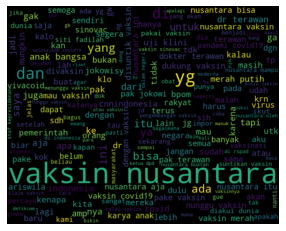

In [ ]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [str (twts) for twts in unclean_data['tweet_preprocessed']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
data=[]
i = 1
for tweet in unclean_data['tweet_preprocessed']:
    katadasar = str(tweet)
    stop = stopword.remove(katadasar)
    hasil=(" ".join(stop.split()))
    data.append([hasil])
    print(i)
    i+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
data = pd.DataFrame(data,columns=['tweet_processing'])
unclean_data = unclean_data.reset_index().drop(['index'], axis=1)
data
unclean_data['tweet_preprocessed'] = data['tweet_processing']
unclean_data


,Unnamed: 0,id,date,username,tweet,link,replies_count,retweets_count,likes_count,moderna,astra,pfizer,sinovac,tweet_preprocessed,labels,response
0,0,1343436517113556992,2020-12-28,matamilenialid,"Tenang, Sandiaga Janji Vaksin Covid-19 Diprior...",https://twitter.com/matamilenialID/status/1343...,0,0,0,0,0,0,0,tenang sandiaga janji vaksin covid19 dipriorit...,vaksinasi,Random
1,1,1343367700479835904,2020-12-28,wow_keren,"Dongkrak Wisata dan Ekonomi, Sandiaga Utamakan...",https://twitter.com/wow_keren/status/134336770...,0,0,0,0,0,0,0,dongkrak wisata ekonomi sandiaga utamakan vaks...,vaksinasi,Random
2,2,1343178718110309888,2020-12-27,id_aksi,Sandiaga Uno Proritaskan Vaksin Covid-19 untuk...,https://twitter.com/id_aksi/status/13431787181...,0,0,0,0,0,0,0,sandiaga uno proritaskan vaksin covid19 wisata...,vaksinasi,Random
3,3,1343072328003898880,2020-12-27,tonaytoni,@ketanminis @tjhinfar21 @kianinara1 @Semut2Sem...,https://twitter.com/tonaytoni/status/134307232...,0,0,3,0,0,0,0,ketanminis tjhinfar21 kianinara1 semut2semut b...,vaksinasi,Random
4,4,1341908620045296128,2020-12-24,stefanusnofa,@berlian_idris @mbahndi Salah satu syarat vaks...,https://twitter.com/stefanusnofa/status/134190...,2,2,10,0,0,0,1,berlianidris mbahndi salah satu syarat vaksin ...,vaksinasi,ragu ragu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,3395,1416087088651333888,2021-07-16,ariswila,"Sambil menunggu hasil akhir Vaksin Nusantara, ...",https://twitter.com/ArisWila/status/1416087088...,4,10,59,0,0,0,0,menunggu hasil akhir vaksin nusantara utk memb...,vaksinasi,Pro Vaksin
3396,3396,1416081394070016000,2021-07-16,qronoz,@sylvkartika @NNugie @rahmimimi Katanya kalo g...,https://twitter.com/qronoz/status/141608139407...,1,0,0,0,0,0,0,sylvkartika nnugie rahmimimi katanya kalo gak ...,vaksinasi,Pro Vaksin
3397,3397,1416076363006550016,2021-07-16,rman46,@Dennysiregar7 Bnyk orang indonesia nunggu vak...,https://twitter.com/rman46/status/141607636300...,0,0,0,0,0,0,0,dennysiregar7 bnyk orang indonesia nunggu vaks...,vaksinasi,Pro Vaksin
3398,3398,1416073251239854080,2021-07-16,bocaharusbawah,@ArisWila Kapan ya vaksin nusantara bisa spt v...,https://twitter.com/BocahArusBawah/status/1416...,1,0,1,0,0,0,1,ariswila kapan vaksin nusantara spt vaksin sin...,vaksinasi,Pro Vaksin


In [ ]:
unclean_data = pd.read_csv('/content/drive/MyDrive/penelitian/data5/data label/data test/nostemm_test_jenisvaksin_sentiment.csv')

In [ ]:
slang = {"@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", 
         "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", 
         "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", 
         "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", 
         "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", 
         "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", 
         "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", 
         "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", 
         "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", 
         "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", 
         "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", 
         "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", 
         "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", 
         "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", 
         "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", 
         "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", 
         "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", 
         "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", 
         "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", 
         "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", 
         "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", 
         "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", 
         "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", 
         "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", 
         "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", 
         "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", 
         "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", 
         "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", 
         "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", 
         "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", 
         "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", 
         "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang","blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin","az":"astrazeneca", "mdrn":"moderna","pfz":"pfizer","bhw":"bahwa", "btl":"betul","":""}


In [ ]:
unclean_data['tweet_preprocessed'] = unclean_data['tweet_preprocessed'].astype(str).apply(lambda x: ' '.join(slang.get(word, word) for word in x.split()))
clean_data = unclean_data
clean_data = clean_data.dropna()
clean_data

,Unnamed: 0,id,date,username,tweet,link,replies_count,retweets_count,likes_count,moderna,astra,pfizer,sinovac,tweet_preprocessed,labels,response
0,0,1343436517113556992,2020-12-28,matamilenialid,"Tenang, Sandiaga Janji Vaksin Covid-19 Diprior...",https://twitter.com/matamilenialID/status/1343...,0,0,0,0,0,0,0,tenang sandiaga janji vaksin covid19 dipriorit...,vaksinasi,Random
1,1,1343367700479835904,2020-12-28,wow_keren,"Dongkrak Wisata dan Ekonomi, Sandiaga Utamakan...",https://twitter.com/wow_keren/status/134336770...,0,0,0,0,0,0,0,dongkrak wisata ekonomi sandiaga utamakan vaks...,vaksinasi,Random
2,2,1343178718110309888,2020-12-27,id_aksi,Sandiaga Uno Proritaskan Vaksin Covid-19 untuk...,https://twitter.com/id_aksi/status/13431787181...,0,0,0,0,0,0,0,sandiaga uno proritaskan vaksin covid19 wisata...,vaksinasi,Random
3,3,1343072328003898880,2020-12-27,tonaytoni,@ketanminis @tjhinfar21 @kianinara1 @Semut2Sem...,https://twitter.com/tonaytoni/status/134307232...,0,0,3,0,0,0,0,ketanminis tjhinfar21 kianinara1 semut2semut b...,vaksinasi,Random
4,4,1341908620045296128,2020-12-24,stefanusnofa,@berlian_idris @mbahndi Salah satu syarat vaks...,https://twitter.com/stefanusnofa/status/134190...,2,2,10,0,0,0,1,berlianidris mbahndi salah satu syarat vaksin ...,vaksinasi,ragu ragu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,3395,1416087088651333888,2021-07-16,ariswila,"Sambil menunggu hasil akhir Vaksin Nusantara, ...",https://twitter.com/ArisWila/status/1416087088...,4,10,59,0,0,0,0,menunggu hasil akhir vaksin nusantara untuk me...,vaksinasi,Pro Vaksin
3396,3396,1416081394070016000,2021-07-16,qronoz,@sylvkartika @NNugie @rahmimimi Katanya kalo g...,https://twitter.com/qronoz/status/141608139407...,1,0,0,0,0,0,0,sylvkartika nnugie rahmimimi katanya kalau gak...,vaksinasi,Pro Vaksin
3397,3397,1416076363006550016,2021-07-16,rman46,@Dennysiregar7 Bnyk orang indonesia nunggu vak...,https://twitter.com/rman46/status/141607636300...,0,0,0,0,0,0,0,dennysiregar7 banyak orang indonesia nunggu va...,vaksinasi,Pro Vaksin
3398,3398,1416073251239854080,2021-07-16,bocaharusbawah,@ArisWila Kapan ya vaksin nusantara bisa spt v...,https://twitter.com/BocahArusBawah/status/1416...,1,0,1,0,0,0,1,ariswila kapan vaksin nusantara seperti vaksin...,vaksinasi,Pro Vaksin


In [ ]:
clean_data.to_excel('/content/drive/MyDrive/penelitian/data4/Train/(Edited) train_jenis vaksin_prokontra.xlsx',index=False)
# clean_data.to_excel('/content/drive/MyDrive/penelitian/data4/Train/(Edited) train_jenis vaksin_prokontra.xlsx')


# Filtering Classification

def load_data(path):
  data = pd.read_csv(path+'.csv')
  return data

In [ ]:
import numpy as np
import pandas as pd

def load_data(path):
  data = pd.read_csv(path,sep=';')
  return data

def save_csv(data, path):
  data.to_csv(path, index=False)
  return print('ok save format csv')

def save_excel(data, path):""
  data.to_excel(path, index = False)
  return print('ok save format excel')


In [ ]:
# import ast
jenis = [
    'vaksin covid19', 'sinovac','vaksin cina', 'vaksin nusantara', 'vaksin merah putih', 'vaksin biofarma', 'vaksin inactivated',
    'vaksin astra zeneca', 'vaksin astrazeneca', 'vaksin mrna', 'vaksin pfizer', 'vaksin moderna','moderna','pfizer','astrazeneca',
    'merah putih', 'biofarma'
]

efektivitas = [
    'kekebalan tubuh', 'cegah penularan covid', 'positivity rated covid', 'positif covid', 'herd immunity', 'angka kematian',
    'varian delta', 'strain delta', 'variant of concern', 'cegah covid berat', 'cegah kebutuhan icu', 'cegah kebutuhan mrs'
]

efeksamping = [
    'kipi', 'kejadian ikutan pasca imunisasi', 'lumpuh', 'pembekuan darah', 'penggumpalan darah', 'kematian akibat vaksin',
    'kematian setelah vaksin','alergi','positif covid','positif covid19', 'ngantuk', 'lapar', 'gangguan seksual', 'efek samping vaksin',
    'bahaya vaksin', 'stroke', 'guillain barre syndrome', 'nyeri', 'bengkak', 'pusing', 'nyeri kepala', 'demam', 'nyeri otot',
    'chip vaksin'
]

vaksinasi = [
    'vaksinasi covid nasional', 'imunisasi covid nasional', 'percepatan vaksinasi', 'vaksinasi masal', 'vaksinasi nakes',
    'vaksinasi lansia', 'vaksinasi anak dan remaja', 'vaksinasi dosis ketiga', 'vaksinasi booster', 'vaksinasi tahap 1',
    'vaksinasi tahap 2', 'vaksinasi tahap 3', 'vaksinasi bumn', 'sertifikat vaksinasi', 'sertifikat vaksin', 'vaksinasi palsu',
    'vaksinasi mandiri', 'vaksinasi usia 1217','vaksinasi 1859', 'vaksinasi gotong royong', 'vaksinasi bayar', 'komorbid vaksinasi', 'vaksinasi'
]

covid = [
    'covid19', 'corona', 'corona virus', 'virus corona', 'sars cov2','covid', 'masker', 'jaga jarak','pyhsical distancing', 'social distancing',
    'cuci tangan', 'ppkm', 'psbb', 'lockdown', 'wfh', 'lfh', 'belajar daring', 'isolasi mandiri', 'swab', 'pcr', '3m', '5m', '6m',
    'tracing', 'komorbid covid19'
]


labels = []
text = ''

# filepath = '/content/drive/MyDrive/penelitian/data5/data clean/efektivitas_clean.csv'
# data = load_data(filepath)
data = clean_data
data.info()
a = data['tweet_preprocessed'].astype(str)
for i in range(len(data)):
    text = a[i]
    label = 'Non efeksamping'

    for keyword in efeksamping :
        if (text.find(keyword) != -1):
            label = 'efeksamping'

    labels.append(label)
data['labels'] = labels
data = data.loc[data['labels'] == 'efeksamping']
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339909 entries, 0 to 339908
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  339909 non-null  object
 1   date                339909 non-null  object
 2   username            339909 non-null  object
 3   tweet               339909 non-null  object
 4   replies_count       339909 non-null  int64 
 5   retweets_count      339909 non-null  int64 
 6   likes_count         339909 non-null  int64 
 7   link                339909 non-null  object
 8   tweet_preprocessed  339909 non-null  object
 9   labels              339909 non-null  object
dtypes: int64(3), object(7)
memory usage: 38.5+ MB


,id,date,username,tweet,replies_count,retweets_count,likes_count,link,tweet_preprocessed,labels
0,1343784560853536768,2020-12-29,ameliaa_linda,"Sebagai contoh pemantauan, laporan KIPI dari c...",0,0,0,https://twitter.com/ameliaa_linda/status/13437...,contoh pemantauan laporan kipi catatan vaksina...,efeksamping
1,1340117320883085312,2020-12-19,e100ss,#SSInfo Prof. Dr. dr. Hindra Irawan Satari Sp....,3,1,9,https://twitter.com/e100ss/status/134011732088...,ssinfo prof dr dr hindra irawan satari spak mt...,efeksamping
2,1339876210160009217,2020-12-18,khofifahip,Simulasi penyuntikan vaksin Covid-19 di Rumah ...,8,6,137,https://twitter.com/KhofifahIP/status/13398762...,simulasi penyuntikan vaksin covid19 rumah saki...,efeksamping
3,1339869074537422848,2020-12-18,blogdokter,Jika vaksinnya sudah mendapatkan approval dari...,6,21,48,https://twitter.com/blogdokter/status/13398690...,vaksinnya mendapatkan approval bpom berarti va...,efeksamping
4,1339470142506291200,2020-12-17,suemarsoni,pedoman memonitor keamanan vaksinasi dan keama...,1,0,0,https://twitter.com/suemarsoni/status/13394701...,pedoman memonitor keamanan vaksinasi keamanan ...,efeksamping
...,...,...,...,...,...,...,...,...,...,...
339904,1347836376398483459,2021-01-09,emiliaz105,@tanyainrl Bisa vaksin flu tapi vaksin flu tuh...,1,0,0,https://twitter.com/emiliaz105/status/13478363...,tanyainrl vaksin flu vaksin flu tuh di ulang t...,efeksamping
339905,1347579105357623297,2021-01-08,elframalia,13. Rangkuman efek samping yang muncul di par...,2,0,0,https://twitter.com/elfrAmalia/status/13475791...,13 rangkuman efek samping muncul para peserta ...,efeksamping
339906,1346478475905957890,2021-01-05,kekasiihgelapmu,@dsuperboy Dilihat dulu gejala nya seperti apa...,1,0,1,https://twitter.com/kekasiihGelapmu/status/134...,dsuperboy dilihat dulu gejala nya apa biasanya...,efeksamping
339907,1345916214292279300,2021-01-04,dr_didik,@NNdrae @RAMujiyono @dayatia @GundiDr @drprion...,0,0,0,https://twitter.com/dr_didik/status/1345916214...,nndrae ramujiyono dayatia gundidr drpriono1 dr...,efeksamping


In [ ]:
df = data
df["moderna"]= df['tweet_preprocessed'].str.find('moderna')
df["astra"]= df['tweet_preprocessed'].str.find('astrazeneca')
df["pfizer"]= df['tweet_preprocessed'].str.find('pfizer')
df["sinovac"]= df['tweet_preprocessed'].str.find('sinovac')
df["nusantara"]= df['tweet_preprocessed'].str.find('nusantara')

df['moderna'] = df['moderna'].fillna(0.0).astype(int)
df['astra'] = df['astra'].fillna(0.0).astype(int)
df['pfizer'] = df['pfizer'].fillna(0.0).astype(int)
df['sinovac'] = df['sinovac'].fillna(0.0).astype(int)
df['nusantara'] = df['nusantara'].fillna(0.0).astype(int)

df['moderna']=df['moderna'].mask(df['moderna'] >= 0,1)

df['astra']=df['astra'].mask(df['astra'] >= 0,1)

df['pfizer']=df['pfizer'].mask(df['pfizer'] >= 0,1)

df['sinovac']=df['sinovac'].mask(df['sinovac'] >= 0,1)

df['nusantara']=df['nusantara'].mask(df['nusantara'] >= 0,1)

# df['replies_count'] = df['replies_count'].fillna(0.0).astype(int)
# df['retweets_count'] = df['retweets_count'].fillna(0.0).astype(int)
# df['likes_count'] = df['likes_count'].fillna(0.0).astype(int)
# df = df.reset_index().drop(['index'],axis=1)
data_join = df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df['moderna']=df['moderna'].mask(df['moderna'] < 0,0)
df['astra']=df['astra'].mask(df['astra'] < 0,0)
df['pfizer']=df['pfizer'].mask(df['pfizer'] < 0,0)
df['sinovac']=df['sinovac'].mask(df['sinovac'] < 0,0)
df['nusantara']=df['nusantara'].mask(df['nusantara'] < 0,0)

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,id,date,username,tweet,replies_count,retweets_count,likes_count,link,tweet_preprocessed,labels,moderna,astra,pfizer,sinovac,nusantara
0,1343784560853536768,2020-12-29,ameliaa_linda,"Sebagai contoh pemantauan, laporan KIPI dari c...",0,0,0,https://twitter.com/ameliaa_linda/status/13437...,contoh pemantauan laporan kipi catatan vaksina...,efeksamping,0,0,0,0,0
1,1340117320883085312,2020-12-19,e100ss,#SSInfo Prof. Dr. dr. Hindra Irawan Satari Sp....,3,1,9,https://twitter.com/e100ss/status/134011732088...,ssinfo prof dr dr hindra irawan satari spak mt...,efeksamping,0,0,0,0,0
2,1339876210160009217,2020-12-18,khofifahip,Simulasi penyuntikan vaksin Covid-19 di Rumah ...,8,6,137,https://twitter.com/KhofifahIP/status/13398762...,simulasi penyuntikan vaksin covid19 rumah saki...,efeksamping,0,0,0,0,0
3,1339869074537422848,2020-12-18,blogdokter,Jika vaksinnya sudah mendapatkan approval dari...,6,21,48,https://twitter.com/blogdokter/status/13398690...,vaksinnya mendapatkan approval bpom berarti va...,efeksamping,0,0,0,0,0
4,1339470142506291200,2020-12-17,suemarsoni,pedoman memonitor keamanan vaksinasi dan keama...,1,0,0,https://twitter.com/suemarsoni/status/13394701...,pedoman memonitor keamanan vaksinasi keamanan ...,efeksamping,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339904,1347836376398483459,2021-01-09,emiliaz105,@tanyainrl Bisa vaksin flu tapi vaksin flu tuh...,1,0,0,https://twitter.com/emiliaz105/status/13478363...,tanyainrl vaksin flu vaksin flu tuh di ulang t...,efeksamping,0,0,0,0,0
339905,1347579105357623297,2021-01-08,elframalia,13. Rangkuman efek samping yang muncul di par...,2,0,0,https://twitter.com/elfrAmalia/status/13475791...,13 rangkuman efek samping muncul para peserta ...,efeksamping,0,0,0,0,0
339906,1346478475905957890,2021-01-05,kekasiihgelapmu,@dsuperboy Dilihat dulu gejala nya seperti apa...,1,0,1,https://twitter.com/kekasiihGelapmu/status/134...,dsuperboy dilihat dulu gejala nya apa biasanya...,efeksamping,0,0,0,0,0
339907,1345916214292279300,2021-01-04,dr_didik,@NNdrae @RAMujiyono @dayatia @GundiDr @drprion...,0,0,0,https://twitter.com/dr_didik/status/1345916214...,nndrae ramujiyono dayatia gundidr drpriono1 dr...,efeksamping,0,0,0,1,0


In [ ]:
df['moderna'].value_counts()

0    307152
1       189
Name: moderna, dtype: int64

In [ ]:
save_csv(df, '/content/drive/MyDrive/penelitian/data5/data clean/vaksinasi_clean_nostem.csv')

ok save format csv


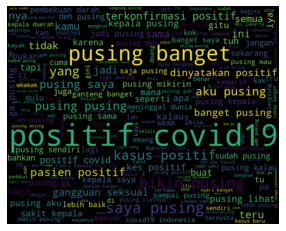

In [ ]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [str (twts) for twts in data['tweet_preprocessed']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
print('Before Cleaning : ', len(load_data('/content/drive/MyDrive/penelitian/data5/result/vaksinasi_fix.csv')))
print('After Cleaning : ', len(load_data('/content/vaksinasi_clean.csv')))

Before Cleaning :  12810
After Cleaning :  12750


In [ ]:
load_data('/content/drive/MyDrive/penelitian/data5/data clean/efektivitas_clean.csv')

,id,date,username,tweet,replies_count,retweets_count,likes_count,link,tweet_preprocessed,labels
0,1423527065010118661,2021-08-06,humasjatirogo,@humas_restuban Mari lakukan vaksinasi demi me...,0,0,0,https://twitter.com/HumasJatirogo/status/14235...,humasrestuban laku vaksinasi wujud herd immuni...,efektivitas
1,1423526866124562436,2021-08-06,humasjatirogo,@humas_restuban Mari lakukan vaksinasi demi me...,0,0,0,https://twitter.com/HumasJatirogo/status/14235...,humasrestuban laku vaksinasi wujud herd immuni...,efektivitas
2,1422941533355999236,2021-08-04,kelieksoedarto,@positiveconten1 Tujuan vaksinasi itu...memini...,1,0,0,https://twitter.com/KeliekSoedarto/status/1422...,positiveconten1 tuju vaksinasi itumeminimalisi...,efektivitas
3,1420938279059214336,2021-07-30,farrr_2,"ayo segera vaksin, gakperlu takut divaksin kar...",0,0,0,https://twitter.com/farrr_2/status/14209382790...,ayo segera vaksin gakperlu takut vaksin vaksin...,efektivitas
4,1419872966389559297,2021-07-27,kpu_lampung,Selain untuk merangsang sistem kekebalan tubuh...,0,1,2,https://twitter.com/kpu_lampung/status/1419872...,untuk rangsang sistem kebal tubuh vaksinasi ku...,efektivitas
...,...,...,...,...,...,...,...,...,...,...
357,1407588454360227841,2021-06-23,matapolitikcom,Otoritas kesehatan India menyebut mutasi COVID...,0,0,0,https://twitter.com/matapolitikcom/status/1407...,otoritas sehat india sebut mutasi covid19 stra...,efektivitas
358,1407242854775152642,2021-06-22,forkompi,WHO baru-baru ini juga mengelompokkan B.1.617 ...,1,0,2,https://twitter.com/Forkompi/status/1407242854...,who barubaru juga kelompok b1617 bagai variant...,efektivitas
359,1404759077658390530,2021-06-15,narasinewsroom,104 dari 145 kasus mutasi virus corona yang te...,1,6,24,https://twitter.com/NarasiNewsroom/status/1404...,104 145 kasus mutasi virus corona golong varia...,efektivitas
360,1394223415158927360,2021-05-17,fitradiobandung,Waspada varian baru Corona memiliki penularan ...,0,0,0,https://twitter.com/FitRadioBandung/status/139...,waspada varian baru corona milik tular covid19...,efektivitas


In [ ]:
import twint
#configuration
config = twint.Config()
config.Search = "bitcoin"
config.Lang = "en"
config.Limit = 100
config.Since = "2019–04–29"
config.Until = "2020–04–30"
config.Store_json = True
config.Output = "custom_out.json"
#running search
twint.run.Search(config)

ValueError: ignored

In [ ]:
df = df.reset_index().drop(['index'],axis=1)

In [ ]:
df.sinovac.value_counts()

0    85078
1      144
Name: sinovac, dtype: int64

In [ ]:
# import ast
jenis = [
    'vaksin covid19', 'sinovac','vaksin cina', 'vaksin nusantara', 'vaksin merah putih', 'vaksin biofarma', 'vaksin inactivated',
    'vaksin astra zeneca', 'vaksin astrazeneca', 'vaksin mrna', 'vaksin pfizer', 'vaksin moderna','moderna','pfizer','astrazeneca',
    'merah putih', 'biofarma'
]

efektivitas = [
    'kekebalan tubuh', 'cegah penularan covid', 'positivity rated covid', 'positif covid', 'herd immunity', 'angka kematian',
    'varian delta', 'strain delta', 'variant of concern', 'cegah covid berat', 'cegah kebutuhan icu', 'cegah kebutuhan mrs'
]

efeksamping = [
    'kipi', 'kejadian ikutan pasca imunisasi', 'lumpuh', 'pembekuan darah', 'penggumpalan darah', 'kematian akibat vaksin',
    'kematian setelah vaksin','alergi','positif covid','positif covid19', 'ngantuk', 'lapar', 'gangguan seksual', 'efek samping vaksin',
    'bahaya vaksin', 'stroke', 'guillain barre syndrome', 'nyeri', 'bengkak', 'pusing', 'nyeri kepala', 'demam', 'nyeri otot',
    'chip vaksin'
]

vaksinasi = [
    'vaksinasi covid nasional', 'imunisasi covid nasional', 'percepatan vaksinasi', 'vaksinasi masal', 'vaksinasi nakes',
    'vaksinasi lansia', 'vaksinasi anak dan remaja', 'vaksinasi dosis ketiga', 'vaksinasi booster', 'vaksinasi tahap 1',
    'vaksinasi tahap 2', 'vaksinasi tahap 3', 'vaksinasi bumn', 'sertifikat vaksinasi', 'sertifikat vaksin', 'vaksinasi palsu',
    'vaksinasi mandiri', 'vaksinasi usia 1217','vaksinasi 1859', 'vaksinasi gotong royong', 'vaksinasi bayar', 'komorbid vaksinasi', 'vaksinasi'
]

covid = [
    'covid19', 'corona', 'corona virus', 'virus corona', 'sars cov2','covid', 'masker', 'jaga jarak','pyhsical distancing', 'social distancing',
    'cuci tangan', 'ppkm', 'psbb', 'lockdown', 'wfh', 'lfh', 'belajar daring', 'isolasi mandiri', 'swab', 'pcr', '3m', '5m', '6m',
    'tracing', 'komorbid covid19'
]

combo = [
         'vaksin', 'vaksinasi'
]

demam = [
          'demam'
]

labels = []
text = ''

# filepath = '/content/efeksamping_fix.csv'
# data = load_data(filepath)
data = df
data.info()
a = data['tweet_preprocessed'].astype(str)
for i in range(len(data)):
    text = a[i]
    label = 'Non demam'

    for keyword in demam :
        if (text.find(keyword) != -1):
            label = 'demam'
            for keyword in demam :
                if (text.find(keyword) != -1):
                    label = 'demamdanvaksin'





    labels.append(label)
data['labels'] = labels
data = data.loc[data['labels'] == 'demamdanvaksin']
data_demamvaksin = data
data_demamvaksin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85222 entries, 0 to 85221
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  85222 non-null  object
 1   date                85222 non-null  object
 2   username            85222 non-null  object
 3   tweet               85222 non-null  object
 4   replies_count       85222 non-null  int64 
 5   retweets_count      85222 non-null  int64 
 6   likes_count         85222 non-null  int64 
 7   link                85222 non-null  object
 8   tweet_preprocessed  85222 non-null  object
 9   labels              85222 non-null  object
 10  moderna             85222 non-null  int64 
 11  astra               85222 non-null  int64 
 12  pfizer              85222 non-null  int64 
 13  sinovac             85222 non-null  int64 
 14  nusantara           85222 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 9.8+ MB


,id,date,username,tweet,replies_count,retweets_count,likes_count,link,tweet_preprocessed,labels,moderna,astra,pfizer,sinovac,nusantara
78531,1329995186319966210,2020-11-21,kemenkesri,"Demam ringan, ruam merah, bengkak merah, &amp;...",2,2,13,https://twitter.com/KemenkesRI/status/13299951...,demam ringan ruam merah bengkak merah amp nyer...,bengkakdanvaksin,0,0,0,0,0
78532,1329786800039084036,2020-11-20,kemenkesri,Vaksin yg diberikan telah lolos uji WHO &amp; ...,1,4,9,https://twitter.com/KemenkesRI/status/13297868...,vaksin yang diberikan lolos uji who amp bpom d...,bengkakdanvaksin,0,0,0,0,0
78538,1423839175309107200,2021-08-07,oksit0sin,9.45 Masih ngilu di area bekas suntikan ditamb...,1,0,2,https://twitter.com/oksit0sin/status/142383917...,945 ngilu area bekas suntikan ditambah bengkak...,bengkakdanvaksin,0,0,0,0,0
78543,1417739177056034817,2021-07-21,whiteskysn,"@sunghoonieuna Itu disebut nya KIPI ka, kejadi...",1,0,0,https://twitter.com/whiteskysn/status/14177391...,sunghoonieuna disebut nya kipi kakak kejadian ...,bengkakdanvaksin,0,0,0,0,0
78576,1426022161488113670,2021-08-13,dimaswrd35_,@ratuurafa Untuk vaksin astrazeneca Ada efek s...,1,0,0,https://twitter.com/dimaswrd35_/status/1426022...,ratuurafa vaksin astrazeneca efek sampingnya d...,bengkakdanvaksin,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85214,1348661338717913091,2021-01-11,bpom_ri,"Pertama, efek samping dari vaksin coronavac ha...",1,0,2,https://twitter.com/BPOM_RI/status/13486613387...,pertama efek samping vaksin coronavac bersifat...,bengkakdanvaksin,0,0,0,0,0
85215,1348648429942050818,2021-01-11,nenkn0nk__,BPOM merilis izin penggunaan darurat vaksin Co...,10,36,48,https://twitter.com/NenkN0nk__/status/13486484...,bpom merilis izin penggunaan darurat vaksin co...,bengkakdanvaksin,0,0,0,1,0
85217,1348576646677237760,2021-01-11,merdekadotcom,Efek Samping Vaksin Sinovac: Iritasi Sampai Di...,0,0,0,https://twitter.com/merdekadotcom/status/13485...,efek samping vaksin sinovac iritasi diare dua ...,bengkakdanvaksin,0,0,0,1,0
85218,1348457430552768514,2021-01-11,gyatmoko,@Hanifah933 @salahsambungya Suntikan vaksin di...,1,1,1,https://twitter.com/GYatmoko/status/1348457430...,hanifah933 salahsambungya suntikanvaksin difte...,bengkakdanvaksin,0,0,0,0,0


In [ ]:
df_fix = df

In [ ]:
save_csv(data,'./vaksin-pusing.csv')

ok save format csv


In [ ]:
data2 = pd.read_csv('/content/efeksamping_fix_2.csv',sep=';')
data2 = data2.dropna().reset_index().drop(['index'],axis=1)

In [ ]:
df

,id,date,username,tweet,replies_count,retweets_count,likes_count,link,tweet_preprocessed,labels,moderna,astra,pfizer,sinovac,nusantara
0,1339180607776014337,2020-12-16,tsetiady,Kejadian Ikutan Pasca Imunisasi (KIPI) sudah d...,1,5,9,https://twitter.com/tsetiady/status/1339180607...,kejadian ikutan pasca imunisasi kipi dicover s...,Non demam,0,0,0,0,0
1,1334437218996391936,2020-12-03,fitradiobandung,Kejadian Ikutan Pasca Imunisasi (KIPI)? Berbah...,0,0,0,https://twitter.com/FitRadioBandung/status/133...,kejadian ikutan pasca imunisasi kipi berbahaya...,Non demam,0,0,0,0,0
2,1326786059083149312,2020-11-12,pedoman_id,"#UjiKlinisAman Sejauh ini, blm ada laporan men...",0,5,4,https://twitter.com/PEDOMAN_id/status/13267860...,ujiklinisaman sejauh belum laporan mengenai ke...,Non demam,0,0,0,0,0
3,1326452113447084033,2020-11-11,kompascom,"Sejauh ini, sambung Rodman, belum ada laporan ...",0,0,0,https://twitter.com/kompascom/status/132645211...,sejauh sambung rodman ada laporan mengenai kej...,Non demam,0,0,0,0,0
4,1324194945331195905,2020-11-05,menantangmega,"""Kita lakukan-lakukan persiapan. SOP, SDM, log...",1,0,0,https://twitter.com/menantangmega/status/13241...,lakukanlakukan persiapan sop sdm logistik dist...,Non demam,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83133,1292948702349242368,2020-08-10,dedeslametr,@bodat__ @arivpermana @sahaL_AS @jokowi Penyak...,0,0,0,https://twitter.com/dedeslametr/status/1292948...,bodat arivpermana sahalas jokowi penyakit tida...,demamdanvaksin,0,0,0,0,0
83134,1425390987715649539,2021-08-11,_adindaputri,Kipi Moderna lumayan juga yaa. 15 menit setela...,0,0,0,https://twitter.com/_Adindaputri/status/142539...,kipi moderna lumayan yaa 15 menit vaksin langs...,demamdanvaksin,1,0,0,0,0
83135,1424213856289624067,2021-08-08,cheliously,efek vaksin ke 3 : lengan bekas suntikan masih...,0,0,0,https://twitter.com/cheliously/status/14242138...,efek vaksin 3 lengan bekas suntikan nyeri amp ...,demamdanvaksin,0,0,0,0,0
83136,1422006028686696448,2021-08-02,pradhanaf,Selama vaksin gejala yg kurasakan: Sinovac sun...,0,0,0,https://twitter.com/pradhanaf/status/142200602...,selama vaksin gejala yang kurasakan sinovac su...,demamdanvaksin,1,0,0,1,0


In [ ]:
join = pd.concat([data,data2],sort=False)

In [ ]:
save_csv(join,'./efeksamping_fix.csv')

ok save format csv


In [ ]:
df = pd.concat([df_fix,data_demamvaksin])
df

,id,date,username,tweet,replies_count,retweets_count,likes_count,link,tweet_preprocessed,labels,moderna,astra,pfizer,sinovac,nusantara
0,1339180607776014337,2020-12-16,tsetiady,Kejadian Ikutan Pasca Imunisasi (KIPI) sudah d...,1,5,9,https://twitter.com/tsetiady/status/1339180607...,kejadian ikutan pasca imunisasi kipi dicover s...,Non demam,0,0,0,0,0
1,1334437218996391936,2020-12-03,fitradiobandung,Kejadian Ikutan Pasca Imunisasi (KIPI)? Berbah...,0,0,0,https://twitter.com/FitRadioBandung/status/133...,kejadian ikutan pasca imunisasi kipi berbahaya...,Non demam,0,0,0,0,0
2,1326786059083149312,2020-11-12,pedoman_id,"#UjiKlinisAman Sejauh ini, blm ada laporan men...",0,5,4,https://twitter.com/PEDOMAN_id/status/13267860...,ujiklinisaman sejauh belum laporan mengenai ke...,Non demam,0,0,0,0,0
3,1326452113447084033,2020-11-11,kompascom,"Sejauh ini, sambung Rodman, belum ada laporan ...",0,0,0,https://twitter.com/kompascom/status/132645211...,sejauh sambung rodman ada laporan mengenai kej...,Non demam,0,0,0,0,0
4,1324194945331195905,2020-11-05,menantangmega,"""Kita lakukan-lakukan persiapan. SOP, SDM, log...",1,0,0,https://twitter.com/menantangmega/status/13241...,lakukanlakukan persiapan sop sdm logistik dist...,Non demam,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307334,1348576646677237760,2021-01-11,merdekadotcom,Efek Samping Vaksin Sinovac: Iritasi Sampai Di...,0,0,0,https://twitter.com/merdekadotcom/status/13485...,efek samping vaksin sinovac iritasi diare dua ...,demamdanvaksin,0,0,0,1,0
307335,1348457430552768514,2021-01-11,gyatmoko,@Hanifah933 @salahsambungya Suntikan vaksin di...,1,1,1,https://twitter.com/GYatmoko/status/1348457430...,hanifah933 salahsambungya suntikanvaksin difte...,demamdanvaksin,0,0,0,0,0
307336,1347836376398483459,2021-01-09,emiliaz105,@tanyainrl Bisa vaksin flu tapi vaksin flu tuh...,1,0,0,https://twitter.com/emiliaz105/status/13478363...,tanyainrl vaksin flu vaksin flu tuh di ulang t...,demamdanvaksin,0,0,0,0,0
307337,1347579105357623297,2021-01-08,elframalia,13. Rangkuman efek samping yang muncul di par...,2,0,0,https://twitter.com/elfrAmalia/status/13475791...,13 rangkuman efek samping muncul para peserta ...,demamdanvaksin,0,0,0,0,0


In [ ]:
data[88154:88158]

,id,date,username,tweet,replies_count,retweets_count,likes_count,link,tweet_preprocessed,labels
88154,"1,34E+18",25/12/2020,geloraco,Gawat! Ada 3.000 WNA Masuk Indonesia Positif C...,1890.0,6160.0,9660.0,https://twitter.com/geloraco/status/1342355761...,gawat 3000 wna masuk indonesia positif covid19,Non pusing
88156,"1,34E+18",25/12/2020,bae_stuty,"Doh, pusing. Pagi pagi nemu akun dagangan koar...",0.0,0.0,0.0,https://twitter.com/Bae_Stuty/status/134227974...,doh pusing pagi pagi nemu akun dagang teriak t...,pusing dan vaksin
88157,"1,34E+18",25/12/2020,fullhaehyuck,Gaada vaksin anti pingsan apa?! Aku pusing mel...,0.0,0.0,10.0,https://twitter.com/fullhaehyuck/status/134235...,tidak ada uang vaksin anti pingsan apa aku pus...,pusing dan vaksin
88158,"1,34E+18",25/12/2020,moccayinyang,@ZOOFESS_ID Terus setelah sembuh dr sariawan (...,0.0,0.0,10.0,https://twitter.com/moccayinyang/status/134229...,zoofessid terus sembuh dr sariawan kenalog is ...,pusing dan vaksin


In [ ]:
x = pd.concat([data_nonnyeri ,data_nyeridanvaksin]).sort_values(['date'],ascending=False ).reset_index().drop(['index'],axis = 1)


In [ ]:
y = pd.concat([data_nonbengkak,data_bengkakvaksin]).sort_values(['date'],ascending=False ).reset_index().drop(['index'],axis = 1)
save_csv(y,'./efeksamping_fix_3.csv')

ok save format csv


## SSL : Labeling Metode  Naive Bayes 

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/penelitian/data4/Train/(data label) train_jenis vaksin_prokontra.xlsx')

In [ ]:
response = data[['response']]
response

,response
0,Pro Vaksin
1,Pro Vaksin
2,Pro Vaksin
3,Pro Vaksin
4,ragu ragu
...,...
3395,Pro Vaksin
3396,Pro Vaksin
3397,Pro Vaksin
3398,Pro Vaksin


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/penelitian/data5/data clean/jenisvaksin_clean_nostem.csv')
train = data[:3400]
test = data[3400:]

In [ ]:
train['response'] = response
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,date,username,tweet,replies_count,retweets_count,likes_count,link,tweet_preprocessed,labels,response
0,1343436517113556992,2020-12-28,matamilenialid,"Tenang, Sandiaga Janji Vaksin Covid-19 Diprior...",0,0,0,https://twitter.com/matamilenialID/status/1343...,tenang sandiaga janji vaksin covid19 dipriorit...,jenis,Pro Vaksin
1,1343367700479836160,2020-12-28,wow_keren,"Dongkrak Wisata dan Ekonomi, Sandiaga Utamakan...",0,0,0,https://twitter.com/wow_keren/status/134336770...,dongkrak wisata ekonomi sandiaga utamakan vaks...,jenis,Pro Vaksin
2,1343178718110310401,2020-12-27,id_aksi,Sandiaga Uno Proritaskan Vaksin Covid-19 untuk...,0,0,0,https://twitter.com/id_aksi/status/13431787181...,sandiaga uno proritaskan vaksin covid19 wisata...,jenis,Pro Vaksin
3,1343072328003899392,2020-12-27,tonaytoni,@ketanminis @tjhinfar21 @kianinara1 @Semut2Sem...,0,0,3,https://twitter.com/tonaytoni/status/134307232...,ketanminis tjhinfar21 kianinara1 semut2semut b...,jenis,Pro Vaksin
4,1342428735132188674,2020-12-25,ariefdestika,@fadjroeL Roadmap Vaksin di nusantara bakalan ...,1,0,0,https://twitter.com/ariefdestika/status/134242...,fadjroel roadmap vaksin nusantara akan apa,jenis,ragu ragu
...,...,...,...,...,...,...,...,...,...,...,...
3395,1416322535025627136,2021-07-17,ed_tirta,Nah vaksin nusantara diakui LN,0,0,2,https://twitter.com/ed_tirta/status/1416322535...,nah vaksin nusantara diakui ln,jenis,Pro Vaksin
3396,1416312475935334400,2021-07-17,am_zilt,@ArisWila Ikut bangga 🙏 Apakah vaksin nusanta...,2,1,3,https://twitter.com/am_zilt/status/14163124759...,ariswila ikut bangga vaksin nusantara tersedia...,jenis,Pro Vaksin
3397,1416311185222168580,2021-07-17,swantara1945,@fadlizon Alhamdulillah jika vaksin berbayar d...,0,0,0,https://twitter.com/swantara1945/status/141631...,fadlizon alhamdulillah vaksin berbayar dibatal...,jenis,Pro Vaksin
3398,1416308867093336065,2021-07-17,ayuarisandi,Pak @jokowi kasih vaksin ini ke anak-anak seko...,0,0,0,https://twitter.com/AyuArisandi/status/1416308...,pak jokowi kasih vaksin anakanak sekolah janga...,jenis,Pro Vaksin


In [ ]:
save_csv(train,'/content/drive/MyDrive/penelitian/data5/data label/data train/nostemm_train_jenisvaksin_sentiment.csv')
save_csv(test,'/content/drive/MyDrive/penelitian/data5/data label/data test/nostemm_test_jenisvaksin_sentiment.csv')

ok save format csv
ok save format csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
data.columns

Index(['id', 'date', 'username', 'tweet', 'replies_count', 'retweets_count',
       'likes_count', 'link', 'tweet_preprocessed', 'NEUTRAL', 'POSITIVE',
       'NEGATIVE'],
      dtype='object')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/penelitian/data5/data label fix/vaksinasi_clean_nostem.csv')
X = data

In [ ]:
X_train, X_test= train_test_split(X, test_size=0.6, random_state=101)

In [ ]:
X_train.to_excel('/content/drive/MyDrive/penelitian/data5/data label fix/train_new/train_vaksinasi.xlsx')

In [ ]:
X_test.to_csv('/content/drive/MyDrive/penelitian/data5/data label fix/test_new/test_vaksinasi.csv')

In [ ]:
data

,id,date,username,tweet,replies_count,retweets_count,likes_count,link,tweet_preprocessed,NEUTRAL,POSITIVE,NEGATIVE
0,1344206054419120128,2020-12-30,mediaindonesia,KPK juga merekomendasikan program vaksinasi ha...,0,0,0,https://twitter.com/mediaindonesia/status/1344...,kpk rekomendasi program vaksinasi juga timbang...,0,1,0
1,1343523365613690881,2020-12-28,dailymateradio,Bappenas : Vaksinasi COVID-19 akan Jadi Pengge...,0,0,0,https://twitter.com/dailymateradio/status/1343...,bappenas vaksinasi covid19 jadi gerak ekonomi ...,1,0,0
2,1342785494933901313,2020-12-26,voidotid,Ini adalah bagian dari rencana vaksinasi COVID...,0,1,0,https://twitter.com/voidotid/status/1342785494...,adalah dari rencana vaksinasi covid19 nasional...,1,0,0
3,1342425490921951237,2020-12-25,irrawardy,ak perlu khawatir. Ketua Komite Penanganan Cov...,0,0,0,https://twitter.com/irrawardy/status/134242549...,saya perlu khawatir ketua komite tangan covid1...,0,1,0
4,1342387556004941826,2020-12-25,diskominfoclp,Vaksinasi Covid-19 sebagai game changer pemuli...,1,0,2,https://twitter.com/diskominfoclp/status/13423...,vaksinasi covid19 bagai game changer pulih eko...,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12803,1362645897469779971,2021-02-19,polseksukmajaya,Dasar: Surat Edaran Nomor: HK.02.02/I/368/202...,0,0,10,https://twitter.com/polseksukmajaya/status/136...,dasar surat edar nomor hk0202i3682021 keluar m...,0,1,0
12804,1362645285575352326,2021-02-19,tmcrestabandung,"Tahu enggak sih? Kelompok Lansia, Komorbid, Pe...",5,0,47,https://twitter.com/tmcrestabandung/status/136...,tahu tidak sih kelompok lanjut usia komorbid s...,1,0,0
12805,1362645149176635396,2021-02-19,milamariamey,Kementerian kesehatan mengeluarkan surat edara...,0,0,4,https://twitter.com/Milamariamey/status/136264...,menteri sehat keluar surat edar yang nyata vak...,0,1,0
12806,1362645108726714369,2021-02-19,polreshalbar01,"Tahu enggak sih? Kelompok Lansia, Komorbid, Pe...",0,0,0,https://twitter.com/polreshalbar01/status/1362...,tahu tidak sih kelompok lanjut usia komorbid s...,1,0,0


In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/penelitian/data5/data label fix/jenisvaksin_clean_nostem.csv')

In [ ]:
X = data2
X_train, X_test= train_test_split(X, test_size=0.7, random_state=101)

In [ ]:
X_train.to_excel('/content/drive/MyDrive/penelitian/data5/data label fix/train_new/train_jenisvaksin.xlsx')

In [ ]:
X_test.to_csv('/content/drive/MyDrive/penelitian/data5/data label fix/test_new/test_jenisvaksin.csv')